In [1]:
import numpy as np
import time
import torch
import matplotlib.pyplot as plt
plt.rc('text', usetex=False)
import multiprocessing as mp
from typing import Union
from abc import ABC
from epde.preprocessing.cheb import process_point_cheb

from epde.preprocessing.deriv_calculators import Heatmap, AbstractDeriv, AdaptiveFiniteDeriv, PolynomialDeriv, SpectralDeriv, TotalVariation

In [2]:
#pyqg
data = np.load('data_pyqg_noise0.npy')         
grid_x = np.load('x_pyqg_noise0.npy')
grid_y = np.load('y_pyqg_noise0.npy')
x = np.load('x_pyqg_noise0.npy')
y = np.load('y_pyqg_noise0.npy')
dx = x[-1] / len(x)
dy = y[-1] / len(y)

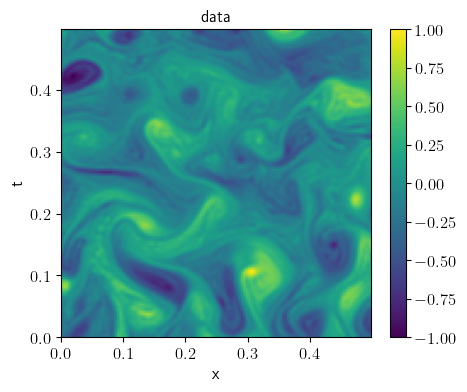

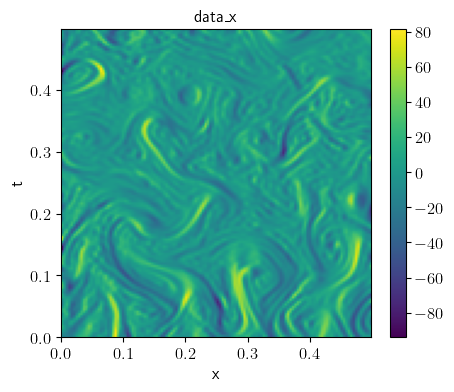

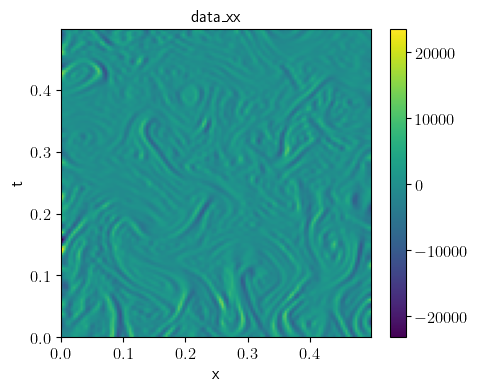

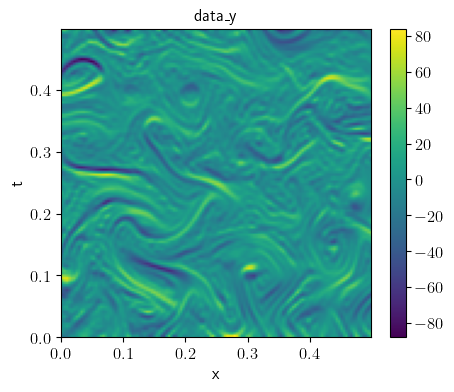

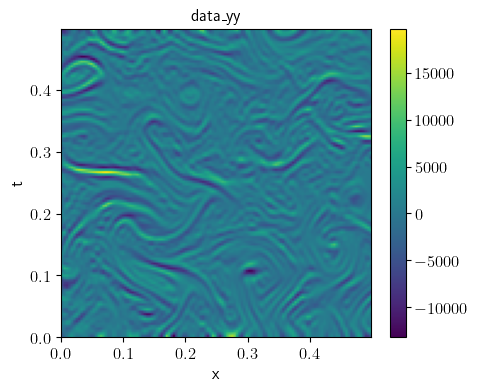

In [3]:
gradient_x = np.gradient(data, dx, axis=1, edge_order=2) 
gradient_y = np.gradient(data, dy, axis=0, edge_order=2)

gradient_xx = np.gradient(gradient_x, dx, axis = 1, edge_order=2)
gradient_yy = np.gradient(gradient_y, dy, axis = 0, edge_order=2)

plt.figure(figsize=(5, 4))
plt.imshow(data, aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_x, aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_xx, aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_y, aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_y')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_yy, aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_yy')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


In [11]:
np.save('pyqg_Gradient_x_noise0.npy', gradient_x)
np.save('pyqg_Gradient_xx_noise0.npy', gradient_xx)
np.save('pyqg_Gradient_y_noise0.npy', gradient_y)
np.save('pyqg_Gradient_yy_noise0.npy', gradient_yy)


In [10]:
print(data.shape)
print(grid_x.shape)
print(grid_t.shape)
derivative_calculator = AdaptiveFiniteDeriv()

max_order = [2, 2]
mixed = False  

derivatives = derivative_calculator(data, [grid_x, grid_t], max_order, mixed).reshape(32, 32, 4)

derivatives1 = derivative_calculator(derivatives[:, :, 1], [grid_x, grid_t], max_order, mixed).reshape(32, 32, 4)

X, Y = np.meshgrid(grid_x, grid_t)

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 0], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_tt')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 2], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 3], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


(128, 128)
(128,)


NameError: name 'grid_t' is not defined

In [30]:
np.save('wave_Adaptive_t_noise0.01.npy', derivatives[:, :, 0])
np.save('wave_Adaptive_tt_noise0.01.npy', derivatives[:, :, 1])
np.save('wave_Adaptive_x_noise0.01.npy', derivatives[:, :, 2])
np.save('wave_Adaptive_xx_noise0.01.npy', derivatives[:, :, 3])


In [18]:
print(data.shape)
print(grid_x.shape)
print(grid_t.shape)

(32, 32)
(32,)
(32,)


1024
1024


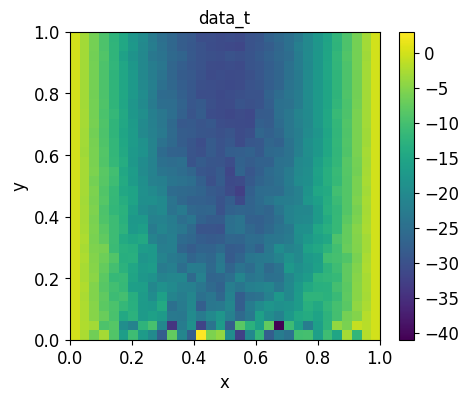

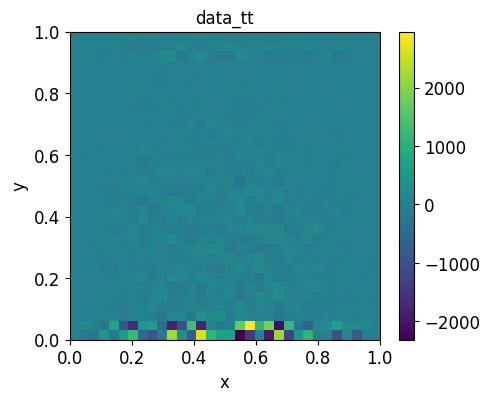

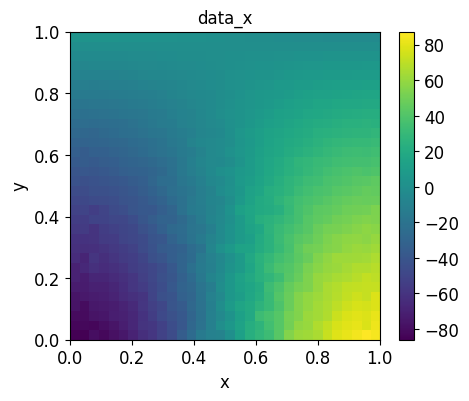

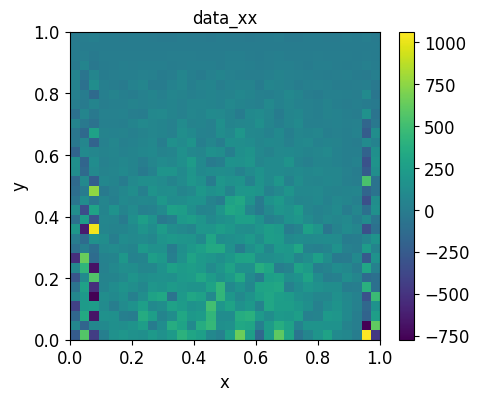

In [31]:
derivative_calculator = PolynomialDeriv()
max_order = 2
grids = np.meshgrid(grid_t, grid_x, indexing='ij')
derivatives = derivative_calculator(data, grids, max_order=max_order, mp_poolsize = 1, polynomial_window = 5, poly_order = 2).reshape(32, 32, 4)
derivatives1 = derivative_calculator(derivatives[:, :, 1], grids, max_order=max_order, mp_poolsize = 1, polynomial_window = 5, poly_order = 2).reshape(32, 32, 4)

X, Y = np.meshgrid(grid_x, grid_t)

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 0], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_tt')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 2], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 3], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [32]:
np.save('wave_Polynomial_t_noise0.01.npy', derivatives[:, :, 0])
np.save('wave_Polynomial_tt_noise0.01.npy', derivatives[:, :, 1])
np.save('wave_Polynomial_x_noise0.01.npy', derivatives[:, :, 2])
np.save('wave_Polynomial_xx_noise0.01.npy', derivatives[:, :, 3])

(128, 128)
2
[array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.286

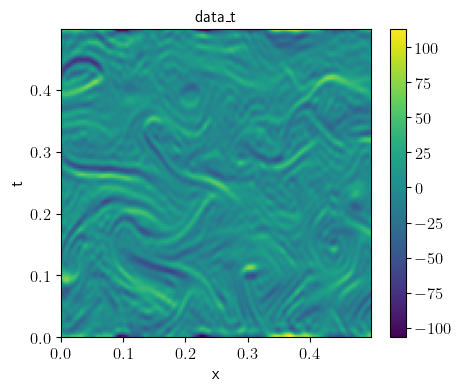

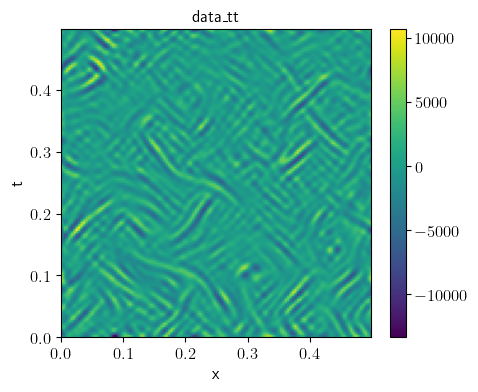

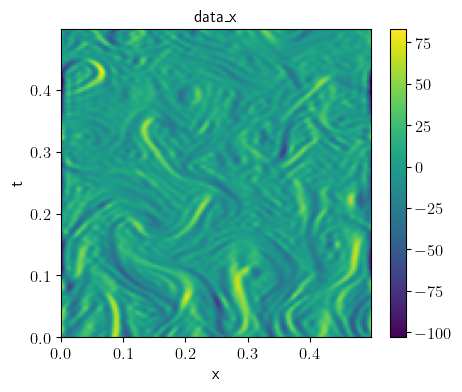

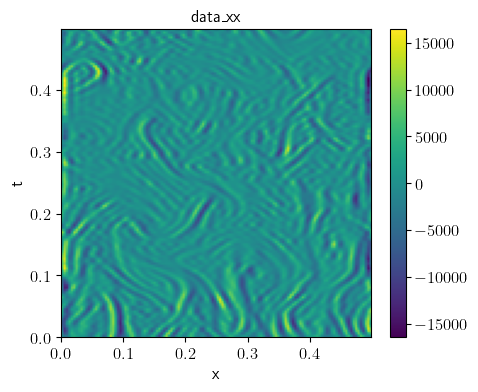

In [6]:
grid = [grid_y, grid_x]
print(data.shape)
print(len(grid))
print(grid)

derivative_calculator = SpectralDeriv()

derivatives = derivative_calculator.spectral_derivative_nd(data, grid, n=60, steepness=10)
derivatives1 = derivative_calculator.spectral_derivative_nd(derivatives[0][1], grid, n=60, steepness=10)
derivatives2 = derivative_calculator.spectral_derivative_nd(derivatives[1][1], grid, n=60, steepness=10)
derivatives3 = derivative_calculator.spectral_derivative_nd(derivatives1[0][1], grid, n=60, steepness=10)

Y, X = np.meshgrid(grid_y, grid_x, indexing = 'ij')

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[0][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives2[0][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_tt')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[1][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives2[1][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [34]:
np.save('wave_Spectral_t_noise0.01.npy', derivatives[0][1])
np.save('wave_Spectral_tt_noise0.01.npy', derivatives2[0][1])
np.save('wave_Spectral_x_noise0.01.npy', derivatives[1][1])
np.save('wave_Spectral_xx_noise0.01.npy', derivatives2[1][1])

(32, 32)
2
[array([-4.        , -3.74193548, -3.48387097, -3.22580645, -2.96774194,
       -2.70967742, -2.4516129 , -2.19354839, -1.93548387, -1.67741935,
       -1.41935484, -1.16129032, -0.90322581, -0.64516129, -0.38709677,
       -0.12903226,  0.12903226,  0.38709677,  0.64516129,  0.90322581,
        1.16129032,  1.41935484,  1.67741935,  1.93548387,  2.19354839,
        2.4516129 ,  2.70967742,  2.96774194,  3.22580645,  3.48387097,
        3.74193548,  4.        ]), array([0.        , 0.03225806, 0.06451613, 0.09677419, 0.12903226,
       0.16129032, 0.19354839, 0.22580645, 0.25806452, 0.29032258,
       0.32258065, 0.35483871, 0.38709677, 0.41935484, 0.4516129 ,
       0.48387097, 0.51612903, 0.5483871 , 0.58064516, 0.61290323,
       0.64516129, 0.67741935, 0.70967742, 0.74193548, 0.77419355,
       0.80645161, 0.83870968, 0.87096774, 0.90322581, 0.93548387,
       0.96774194, 1.        ])]
(32, 32)
[[ 0.0159271   0.02033609  0.02586235 ... -0.06320429 -0.05126239
  -0.041129

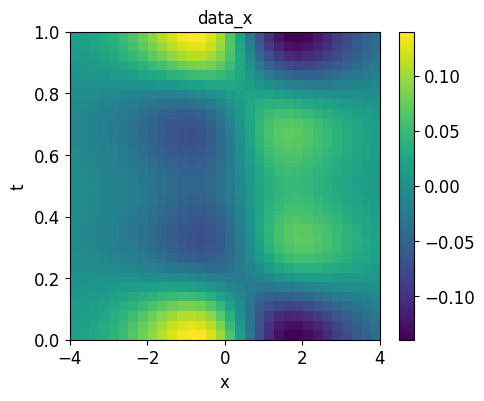

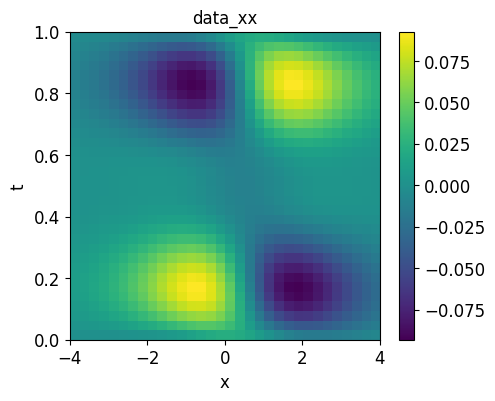

IndexError: list index out of range

<Figure size 500x400 with 0 Axes>

In [22]:
grid = [grid_x, grid_t]
print(data.shape)
print(len(grid))
print(grid)

derivative_calculator = SpectralDeriv()

derivatives = derivative_calculator.spectral_derivative_high_ord(data, grid, max_order=2, n=[5, 5], steepness=10)
X, Y = np.meshgrid(grid_x, grid_t)
print(derivatives[0][1])

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[0][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[1][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[2][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


For some reason has to be abysmal: (-8701.167438985083, 3140.6684661775953)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
For some reason has to be abysmal: (-258.8590189611358, 134.00108413696805)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


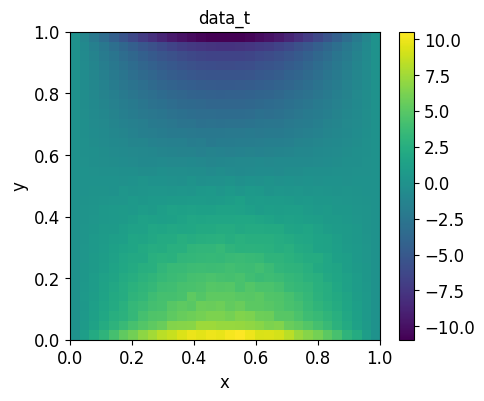

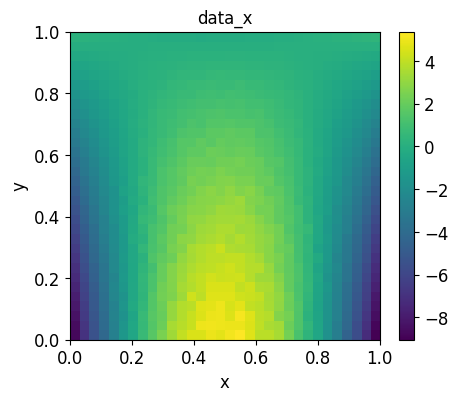

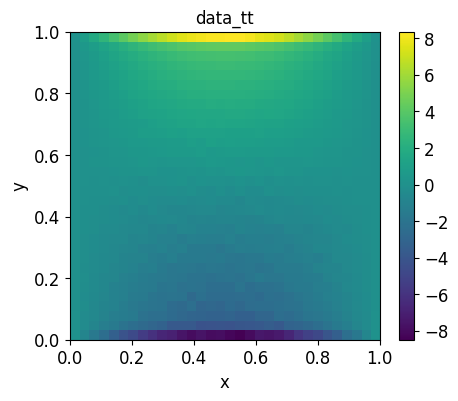

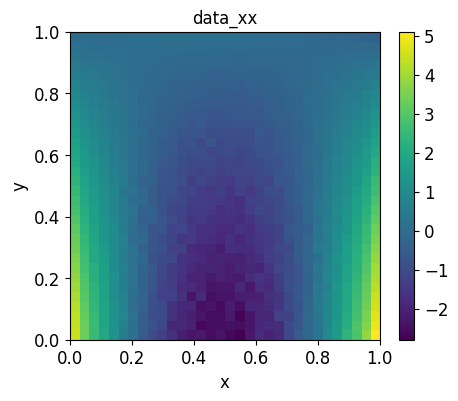

In [35]:
lbd = 1000
reg_strng = 100
c_const = 1

derivative_calculator = TotalVariation()

derivatives1 = derivative_calculator.optimize_with_admm(data, lbd, reg_strng, c_const)
derivatives2 = derivative_calculator.optimize_with_admm(derivatives1[0, :, :], lbd, reg_strng, c_const)
derivatives3 = derivative_calculator.optimize_with_admm(derivatives1[1, :, :], lbd, reg_strng, c_const)
#derivatives4 = derivative_calculator.optimize_with_admm(derivatives2[0, :, :], lbd, reg_strng, c_const)#третья производная

Y, X = np.meshgrid(grid_t, grid_x, indexing = 'ij')

plt.figure(figsize=(5, 4))
plt.imshow(derivatives1[0, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives1[1, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives2[0, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_tt')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives3[1, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [36]:
np.save('wave_Total_x_noise0.01.npy', derivatives1[1, :, :])
np.save('wave_Total_xx_noise0.01.npy', derivatives3[1, :, :])
np.save('wave_Total_t_noise0.01.npy', derivatives1[0, :, :])
np.save('wave_Total_tt_noise0.01.npy', derivatives2[0, :, :])
